**Description** A simple yet challenging project, to predict the housing price based on certain factors like house town, flat types, lease time, etc. The dataset get limited data features (not comprehensive), can you overcome the obstacles & build a decent predictive model?

<b>Example of steps:</b> Data processing, Split the data, Model selection and training, Model evaluation and Model tuning.

# Leaning Objectives
### In this module, we will cover:
<ul>
    <li> Pre-process the dataset for machine learning input, e.g., split training and test dataset. </li>
    <li> Learn the various predictive modeling techniques: linear regression, decision trees, random forest, support vector machines and neural networks. </li>
    <li> Build Regression models to predict the sales w.r.t a single & multiple features. </li>
    <li> Also evaluate the models & compare their respective scores like R2, RMSE, etc. </li>
</ul>

### Read the cleaned data files into DataFrame

>`pandas.read_csv()`

We will load the earlier exported CSV data from "Data Manipulation with Pandas" (Stage I).
                                                                               
**Singapore Resale HDB Housing Price public dataset 2017-2022.**

In [1]:
import pandas as pd

# Read the CSV file
housing_data = pd.read_csv('House_Datasets/stage_I_housing_data.csv')

# View the first 2 rows
housing_data.head(2)

,month,town,flat_type,block,street_name,storey_range,storey_category,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,remaining_lease_numerical,resale_price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,Low-mid rise,44.0,Improved,1979,61 years 04 months,61.333333,232000.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,Low-rise,67.0,New Generation,1978,60 years 07 months,60.583333,250000.0


### Preparation: Data Processing
We will prepare the data first following the step-by-step guide.

<b> Task 1. Data Pre-Processing. </b>
<hr>
<blockquote>
    <ul>
    <li><b>Type assignment:</b> The default data load may cause many types unassigned, so we need to re-assign the correct data types to the necessary columns. </li>
    <li><b>Convert Categorical Variables: </b> Convert categorical variables to numeric using techniques like one-hot encoding. <img src="House_Datasets/one_hot_encoding.png" width="400"> </li>
    <li><b>Feature Engineering</b>: Create new features if necessary, such as extracting the year from the month column.</li>
    </ul>
</blockquote>

The `dtype 'O'` stands for `'object'` in pandas, which typically indicates that the column contains mixed types or strings.

In [2]:
# Convert columns to appropriate types
housing_data['month'] = pd.to_datetime(housing_data['month'], format='%Y-%m-%d')  # Convert month to datetime
housing_data['floor_area_sqm'] = pd.to_numeric(housing_data['floor_area_sqm'])  # Convert floor_area_sqm to numeric
housing_data['lease_commence_date'] = housing_data['lease_commence_date'].astype(int)  # Convert lease_commence_date to numeric
housing_data['remaining_lease_numerical'] = pd.to_numeric(housing_data['remaining_lease_numerical'])  # Convert resale_price to numeric
housing_data['resale_price'] = pd.to_numeric(housing_data['resale_price'])  # Convert resale_price to numeric

# If there are categorical columns, convert them to 'category' dtype
categorical_columns = ['town', 'flat_type', 'flat_model', 'storey_range', 'storey_category', 'flat_model']
for column in categorical_columns:
    housing_data[column] = housing_data[column].astype('category')

# Define the logical order for flat types
flat_type_order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']

# Convert the flat_type column to a categorical type with the specified order
housing_data['flat_type'] = pd.Categorical(housing_data['flat_type'], categories=flat_type_order, ordered=True)

# Convert the new column to an ordered categorical type
storey_category_order = ['Low-rise', 'Low-mid rise', 'Mid-rise', 'High-mid rise', 'High-rise']
housing_data['storey_category'] = pd.Categorical(housing_data['storey_category'], categories=storey_category_order, ordered=True)

# New features derived, e.g., year
housing_data['year'] = housing_data['month'].dt.year.astype('int32')

# Filter those needed features and target label
target = 'resale_price'
vain_features = ['month', 'block', 'street_name', 'storey_range', 'lease_commence_date', 'remaining_lease']

data_encoded = housing_data.drop(vain_features, axis =1)

# Perform one-hot encoding for categorical variables
categorical_columns = ['town', 'flat_type', 'storey_category', 'flat_model', 'year']
data_encoded = pd.get_dummies(data_encoded, columns=categorical_columns)

# Ensure all columns are numeric
data_encoded = data_encoded.apply(pd.to_numeric, errors='coerce')

# Drop missing values, e.g., NaN
data_encoded = data_encoded.dropna()

# Ensure no non-numeric columns remain
assert data_encoded.select_dtypes(include=['object']).empty, "There are still non-numeric columns present."

# Check the dtypes after conversion
print(data_encoded.dtypes)

floor_area_sqm               float64
remaining_lease_numerical    float64
resale_price                 float64
town_ANG MO KIO                 bool
town_BEDOK                      bool
                              ...   
year_2018                       bool
year_2019                       bool
year_2020                       bool
year_2021                       bool
year_2022                       bool
Length: 68, dtype: object


<b> Task 2. Data Split. </b>

Split the data into training and testing sets.
<hr>
<blockquote>
    <ul>
    <li><b>Splitting</b>: Split the data into training & testing sets. </li>
    <li><b>Scaling</b>: Scale the numeric features if required.</li>
    </ul>
</blockquote>

In [3]:
#Splitting the data intro training & testing sets
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = data_encoded.drop(target, axis=1)
Y = data_encoded[target]

Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)
Train_X.reset_index(drop=True,inplace=True)

# Display the shapes of the resulting datasets
print("X_train shape:", Train_X.shape)
print("X_test shape:", Test_X.shape)
print("Y_train shape:", Train_Y.shape)
print("Y_test shape:", Test_Y.shape)

X_train shape: (107127, 67)
X_test shape: (26782, 67)
Y_train shape: (107127,)
Y_test shape: (26782,)


In [4]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(Train_X)

# Transform the testing data
X_test_scaled = scaler.transform(Test_X)

### Regression Models on Housing Price Prediction
We will conduct a few predictive modeling for the processed data, including the model 

<b> ML models to be compared:</b>
<hr>
<blockquote>
    <ul>
    <li><b>OLS Linear Regression:</b> The most basic optimization strategy which helps to find a straight line as close as possible to the data points.<br>
    <img src="House_Datasets/OLS_LinearRegression.png" width="150"></li>
    <li><b>Lasso Regression Model: </b> performs both shrinkage and variable selection to simplify linear regression models and prevent overfitting. <br>     <img src="House_Datasets/Lasso_regression.png" width="200"> </li>
    <li><b>Ridge Regression Model: </b>: similar to Lasso regression, a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated.</li><br>
    <img src="House_Datasets/Ridge_regression.png" width="250"></li>
    <li><b>Polynomial Regression Model: </b>: In the case that X and Y are not linearly related, this method could explore more nonlinear relationships. </li><br>
    <img src="House_Datasets/Polynomial_regression.png" width="450"></li>
    <li><b>Decision Tree Regression Model: </b>: Referred as regression trees or CARTs. Decision trees can be used for regression tasks by building regression trees, where the goal is to predict continuous values rather than discrete classes.</li><br>
    <img src="House_Datasets/DecisionTree_regression.png" width="300"></li>
    </ul>
</blockquote>

The `dtype 'O'` stands for `'object'` in pandas, which typically indicates that the column contains mixed types or strings.

<b> Model 1: OLS Linear Regression. </b>

We will start with one of the most basic but useful machine learning model, Linear Regression. 
<hr>
<blockquote>
    <ul>
    <li><b>Build the model</b>: A linear combination of given data variables. </li>
    <li><b>Performance Metrics: </b> Calculate the MSE (Mean Squared Error) and R-square (Coefficient of Determination)</li>
    <li><b>Issues on Multicollinearity</b>: We will use VIF to detect those variables and drop those with high VIF and re-run the model.</li>
    </ul>
</blockquote>

In [5]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_scaled, Train_Y)

# Make predictions on the testing data
Y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(Test_Y, Y_pred)
r2 = r2_score(Test_Y, Y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3500680176.246408
R-squared: 0.866858768039537


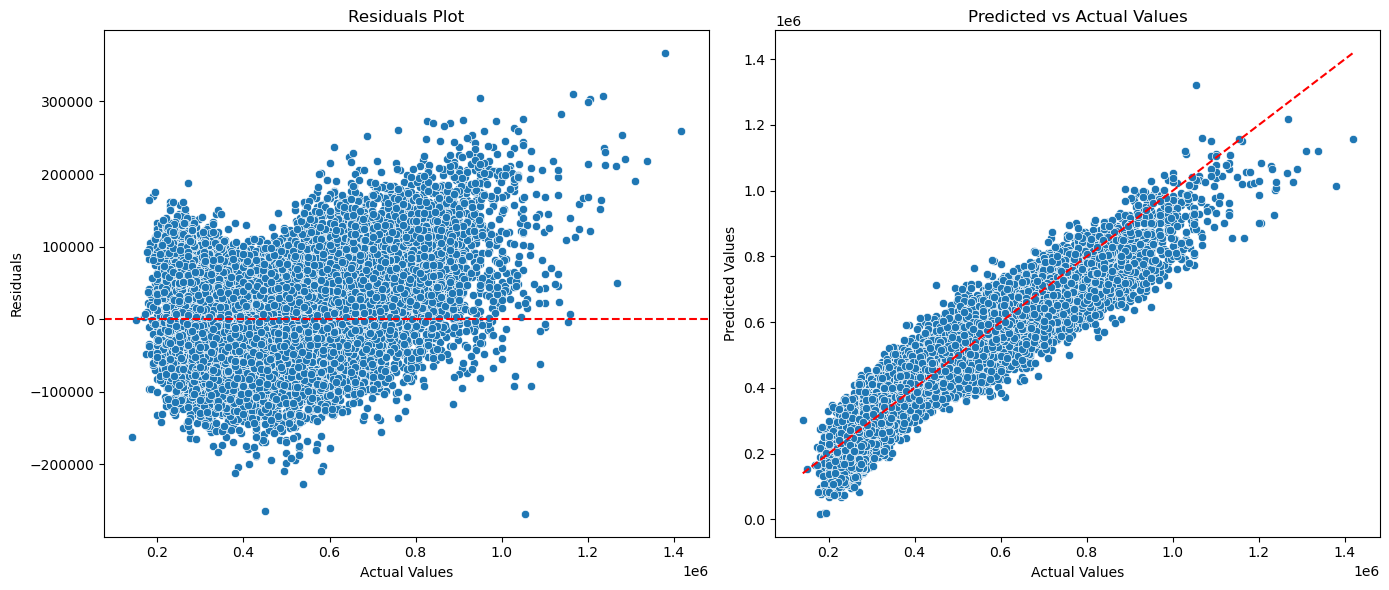

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the residuals
residuals = Test_Y - Y_pred

plt.figure(figsize=(14, 6))

# Residuals plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=Test_Y, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.savefig('residuals_plot.png')

# Predictions vs Actual
plt.subplot(1, 2, 2)
sns.scatterplot(x=Test_Y, y=Y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.plot([Test_Y.min(), Test_Y.max()], [Test_Y.min(), Test_Y.max()], color='r', linestyle='--')
plt.savefig('predictions_vs_actual.png')

plt.tight_layout()
plt.show()

In [7]:
# Import necessary libraries
import statsmodels.api as sm

# Add a constant term for the intercept
X_train_scaled = sm.add_constant(X_train_scaled)

# Fit the linear regression model using statsmodels
model = sm.OLS(Train_Y, X_train_scaled).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                 1.180e+04
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:31:40   Log-Likelihood:            -1.3284e+06
No. Observations:              107127   AIC:                         2.657e+06
Df Residuals:                  107065   BIC:                         2.657e+06
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.373e+05   2392.775     57.377      0.0

### Checking the VIF

The warning about the smallest eigenvalue being extremely small suggests that there might be multicollinearity issues or that the design matrix is nearly singular. This often occurs when some features are highly correlated with each other, which can affect the stability and interpretability of the regression coefficients.

To address this issue, we can perform several steps:

* <b>Check for Multicollinearity</b>: Use the Variance Inflation Factor (VIF) to identify and remove highly collinear features.
* <b>Regularization</b>: Use Ridge or Lasso regression, which are less sensitive to multicollinearity.

<b> Step 1: Check for Multicolinearity using VIF</b>
ariance Inflation Factor (VIF) quantifies how much the variance of a regression coefficient is inflated due to collinearity with other features. A VIF value greater than 10 indicates high multicollinearity.

Note : To calculate the VIF, you need to use the original DataFrame before scaling. 

In [8]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [13]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Calculating the Variance Inflation Factor
try:
    Train_X = Train_X.astype(float)
except ValueError:
    pass

# Step 1: Calculate the correlation matrix
corr_matrix = Train_X.corr()

# Step 2: Identify highly correlated features
threshold = 0.9  # Define the correlation threshold
high_corr_var = np.where(np.abs(corr_matrix) > threshold)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

# Remove one feature from each pair of highly correlated features
for var_pair in high_corr_var:
    print("High correlation between: ", var_pair)
    if var_pair[1] in X.columns:
        Train_X.drop(var_pair[1], axis=1, inplace=True)

# Recalculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = Train_X.columns
vif_data['VIF'] = [variance_inflation_factor(Train_X.values, i) for i in range(len(Train_X.columns))]

# Filter and print VIF results less than or equal to 10
vif_filtered = vif_data[vif_data['VIF'] <= 100]
print("Features with VIF <= 100:\n", vif_filtered)

D:\Software\Anaconda\envs\Capstone_Project\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Features with VIF <= 100:
                      feature        VIF
0             floor_area_sqm  20.725166
1  remaining_lease_numerical   3.302885


<b> Step 2: Drop those features with high VIF</b>

To drop features with high VIF values and retain only those with acceptable multicollinearity

In [17]:
# Define the revised dataset for (X) and the target (y)
X = data_encoded[['floor_area_sqm', 'remaining_lease_numerical']]
Y = data_encoded[target]

Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)
Train_X.reset_index(drop=True,inplace=True)

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(Train_X)
X_train_scaled = sm.add_constant(X_train_scaled)

# Fit the linear regression model using statsmodels
model = sm.OLS(Train_Y, X_train_scaled).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                 4.265e+04
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:45:56   Log-Likelihood:            -1.4065e+06
No. Observations:              107127   AIC:                         2.813e+06
Df Residuals:                  107124   BIC:                         2.813e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.137e+05   1310.002     86.809      0.0

<b> Model 2 & 3: Regularization with Ridge Regression & Lasso Regression. </b>

If multicollinearity is detected, regularization techniques like Ridge or Lasso regression can help. What makes regression model more effective is its ability of regularizing. The term "regularizing" stands for models ability to structurally prevent overfitting by imposing a penalty on the coefficients.

These regularization methods work by penalizing the <b>magnitude of the coefficients of features</b> and at the same time <b>minimizing the error between the predicted value and actual observed values</b>. This minimization becomes a balance between the error (the difference between the predicted value and observed value) and the size of the coefficients. The only difference between Ridge and Lasso is the way they penalize the coefficients.

In [21]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Define the features (X) and the target (y)
X = data_encoded.drop(target, axis=1)
y = data_encoded['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
# pca = PCA(n_components=0.95)  # Keep 95% of variance
#X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)

# Define a function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    return mse_train, r2_train, mse_test, r2_test

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor()
}

# Evaluate models
results = {}
for model_name, model in models.items():
    mse_train, r2_train, mse_test, r2_test = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    results[model_name] = {
        "MSE Train": mse_train,
        "R2 Train": r2_train,
        "MSE Test": mse_test,
        "R2 Test": r2_test
    }

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("Model comparison results:\n", results_df)

# Fit the linear regression model using statsmodels for detailed analysis
X_train_scaled_sm = sm.add_constant(X_train_scaled)
model_sm = sm.OLS(y_train, X_train_scaled_sm).fit()

# Print the summary of the statsmodels linear regression model
print(model_sm.summary())

D:\Software\Anaconda\envs\Capstone_Project\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.111e+13, tolerance: 2.856e+11
  model = cd_fast.enet_coordinate_descent(


Model comparison results:
                       MSE Train  R2 Train      MSE Test   R2 Test
Linear Regression  3.453014e+09  0.870483  3.500680e+09  0.866859
Ridge Regression   3.452772e+09  0.870493  3.500099e+09  0.866881
Lasso Regression   3.452727e+09  0.870494  3.499772e+09  0.866893
Decision Tree      1.771418e+08  0.993356  2.209866e+09  0.915952
                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                 1.180e+04
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:50:09   Log-Likelihood:            -1.3284e+06
No. Observations:              107127   AIC:                         2.657e+06
Df Residuals:                  107065   BIC:                         2.657e+06
Df Model:  